# Lab9 - Build a ML Pipeline from scratch

In this lab, you will build your ML pipeline including **pre-processing** and **model training** using with [Pandas](https://pandas.pydata.org/) and [Scikit-Learn](https://scikit-learn.org/stable/) libraries.


[Pandas](https://pandas.pydata.org/) is a Python library useful for handling and analyzing data structures, particularly bidimensional tables and time series (i.e., data associated with time). It provides useful data structures (e.g., Series and DataFrames) to manage data effectively. The library provides tools for managing the data selection, transforming data with grouping and pivoting operations, managing missing data in the dataset, and performing statistics and charts on data. Pandas is based on [Numpy](https://numpy.org/) arrays.

[Scikit-Learn](https://scikit-learn.org/stable/) is a Python library that implements many machine learning algorithms, and it is built on [Numpy](https://numpy.org/), [SciPy](https://scipy.org/) and [Matplotlib](https://matplotlib.org/). In Scikit-learn both *unsupervised* (e.g., K-Means, DBScan clustering algorithms), and *supervised* algorithms for *regression* and *classification* tasks are available. Scikit-Learn also provides  useful functions for data pre-processing, feature extraction, feature selection, and dimensionality reduction.

A typical **machine learning pipeline** involves the following steps:
  1. **Data Collection**: Gather your data. - *(uncovered)*
  2. **Data Exploration**: Perform exploratory data analysis to understand patterns, distributions, and correlations in the data.
  3. **Data Splitting**: Split the dataset into training, validation (optional), and test sets.
  4. **Data Cleaning**: Handle missing values, remove duplicates, and correct errors.
  5. **Feature Selection**: Select relevant features and remove redundant ones.
  6. **Data Transformation**: Normalization, standardization, and encoding.
  7. **Feature Engineering**: Create new features or modify existing ones (e.g., discretization).
  8. **Data Augmentation**: Augment the training set to increase its size and variability (if possible). Apply techniques like oversampling, undersampling, or [SMOTE](https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c) to handle imbalanced data. - *(uncovered)*
  9. **Model Selection and Training**: Choose and train the model using the pre-processed training set.
  10. **Hyperparameters Tuning**: Explore various hyperparameter configurations to improve upon the baseline model's performance.  Evaluate each set of hyperparameters using a validation set or cross-validation to assess the model's performance. - *(uncovered)*
  11. **Model Evaluation**: Evaluate the model's performance on the preprocessed test set using appropriate metrics.

You can also create pre-processing pipelines that automate all the pre-processing steps.

The previous steps are just a general list. However, they depend on the model you want to train. For example, tree-based algorithms such as decision trees and random forests can handle categorical data naturally. This, they do not require the encoding of categorical features and normalization/standardization.

 Note that, it is reccomended to split the dataset early in the process and using *only* the training set for deriving any data-specific insights or transformations are fundamental practices to prevent data leakage and ensure the model's generalizability to new data. This approach maintains the test set as an unbiased assessment of the model's performance.

In [22]:
# Import the required libraries for this exercise

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


## 1. Load dataset

In this exercise, you will train machine learning models to predict diabetes in patients based on their medical history and demographic information, using the **Diabetes prediction dataset**.

The **Diabetes prediction dataset** is a collection of medical and demographic data records from patients, and their diabetes status (positive or negative).


This is an example of real-world medical application. Indeed, this model can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans.


Each record includes several features, such as:
- **Pregnancies**
- **Glucose**
- **BloodPressure**
- **SkinThickness**
- **Insulin**
- **BMI**
- **DiabetesPedigreeFunction**
- **Age**

And of course the target variable
- **Outcome**

You can find more info here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


In [23]:
df = pd.read_csv('data_lab9/diabetes.csv')
X= df.drop('Outcome', axis=1)
y = df['Outcome']

## 2. Data Exploration

In [24]:
X.shape,y.shape

((768, 8), (768,))

In [25]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [27]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000




<details>
<summary><strong>There is something weird about this dataset, did you notice?</strong></summary>

Can minimum value of below listed columns be zero (0)?¶

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

</details>



In [28]:
X[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
X.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

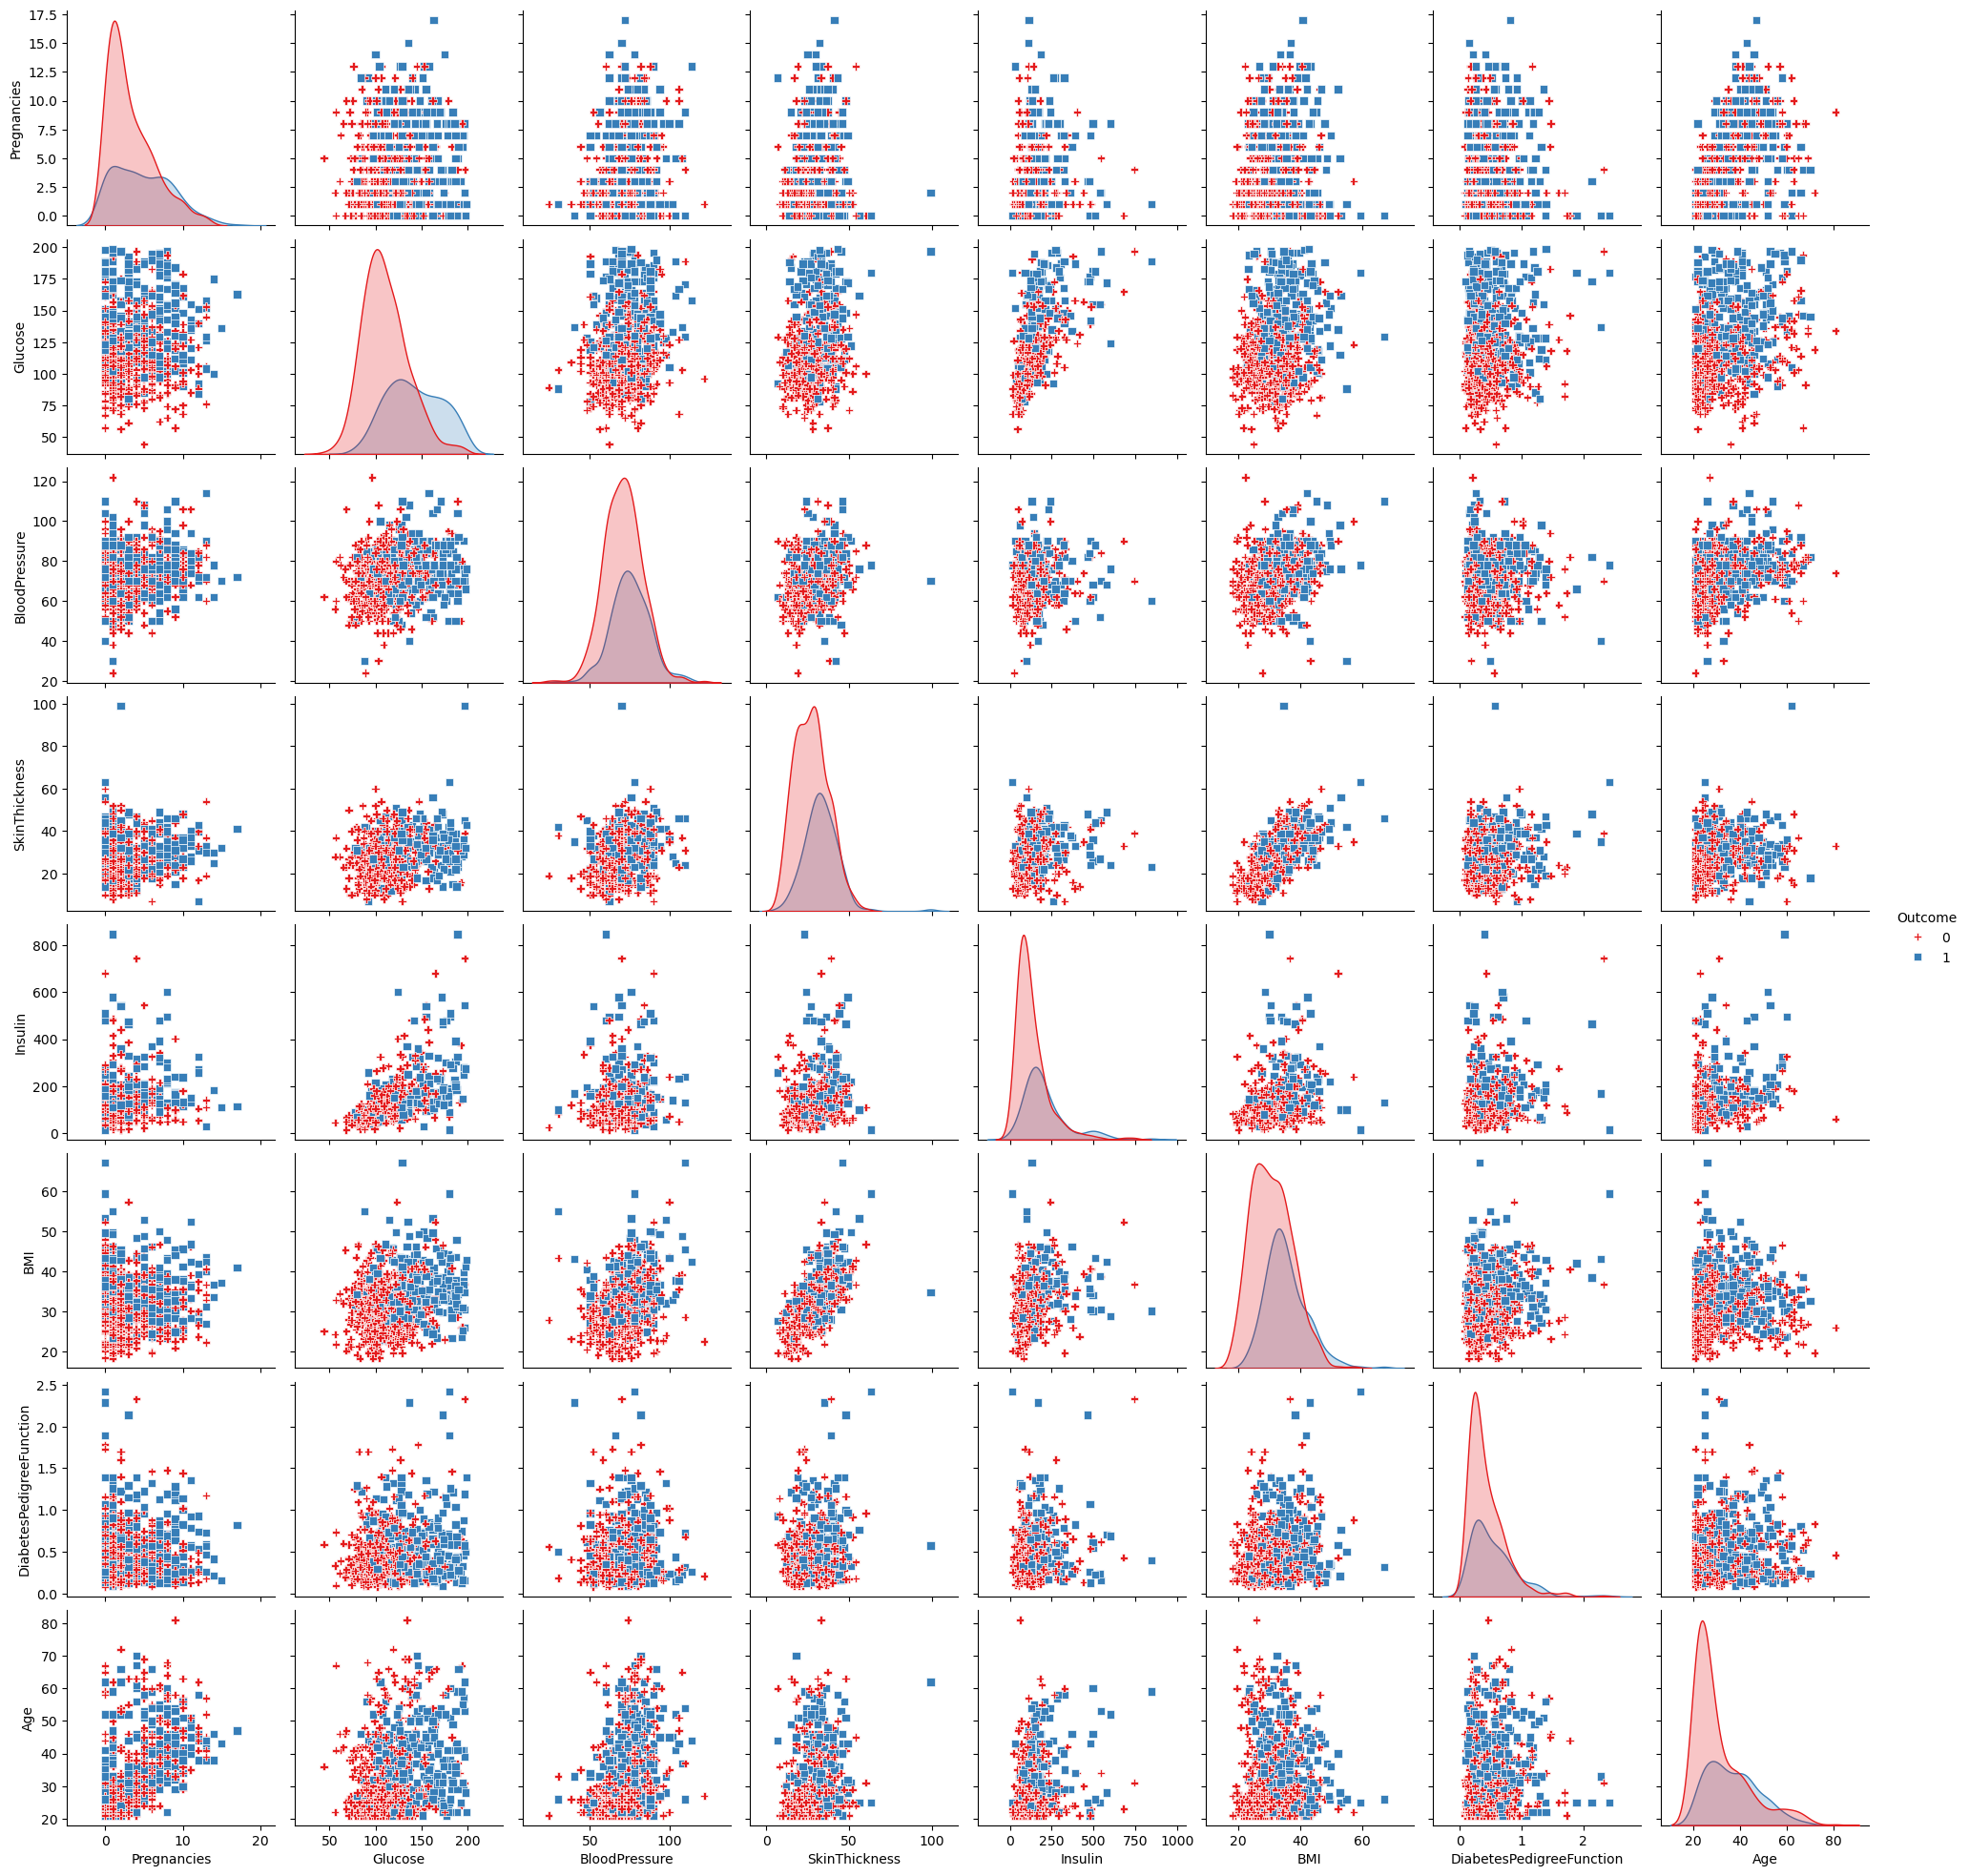

In [29]:
import seaborn as sns
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
sns.pairplot(df, hue='Outcome', markers=["P", "s"], palette="Set1")

1. Perform the pre-processing:
  * Split into **train** and **test** sets (80% train and 20% test).
  * Handling **missing values**.
  * **Remove** useless or redundant features.
  * **Combine features** to create new features.
  * Perform **discretization** of features if necessary.
  * Encode **categorical features**.
  * Perform **normalization** or **standardization** of input features.
  * **Encode the target** variable if necessary.

<details>
<summary><strong>Hints</strong></summary>

- When performing the pre-processing steps, compute the statistics on training and transform the test data accordingly.
- All the categorical features must be properly encoded.
- The dataset is highly imbalanced. F1 score and recall are more appropriate metrics for this task.

</details>


2. Train one or more **binary classifiers** to predict the diabetes status of patiens. Use appropriate evaluation metrics to identify the best performing model. 

**!!** Remember to tune the hyperparameters


This time the exercise is **open-ended**, so it is up to you to write all the code to carry out these steps.

In [30]:
# 2. Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [31]:
# 3. Handle missing values
temp_num_imputer = SimpleImputer(strategy="mean")
temp_cat_imputer = SimpleImputer(strategy="most_frequent")
for col in X_train.select_dtypes(include=['int64', 'float64']).columns:
    X_train[col] = temp_num_imputer.fit_transform(X_train[[col]])
    X_test[col] = temp_num_imputer.transform(X_test[[col]])
for col in X_train.select_dtypes(include=['object', 'category']).columns:
    X_train[col] = temp_cat_imputer.fit_transform(X_train[[col]])
    X_test[col] = temp_cat_imputer.transform(X_test[[col]])

In [32]:
X_train.isnull().sum(),X_test.isnull().sum()

(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 dtype: int64,
 Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 dtype: int64)

<Axes: >

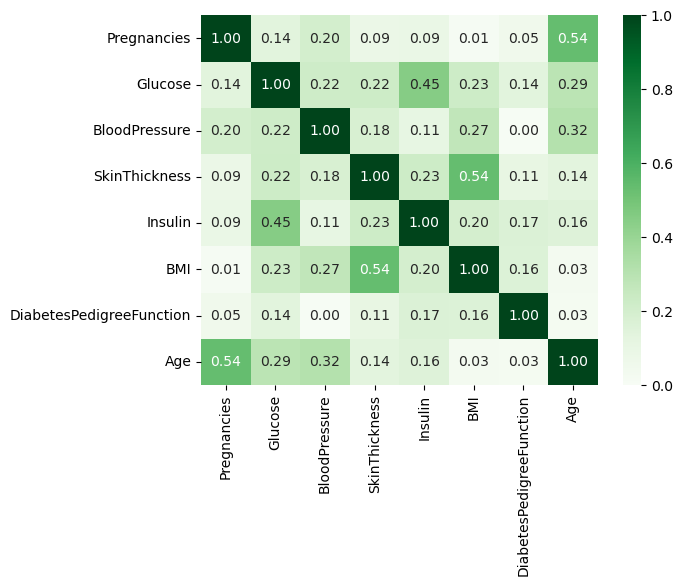

In [33]:
# 4. Remove redundant features using correlation matrix
# Compute the correlation matrix and remove one of each pair of highly correlated features
corr_matrix = X_train.corr().abs() #already absolute values

sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f',vmin=0, vmax=1)


In [34]:
upper= corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Features to drop due to high correlation:", to_drop)
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

Features to drop due to high correlation: []


In [35]:
# 5. Combine features to create new ones 
if 'bmi' in X_train.columns and 'age' in X_train.columns:
    X_train['bmi_age'] = X_train['bmi'] * X_train['age']
    X_test['bmi_age'] = X_test['bmi'] * X_test['age']

for col in X_train.columns:
    if X_train[col].dtype in ['int64', 'float64'] and col not in ['bmi_age']:
        X_train[f"{col}_squared"] = X_train[col] ** 2
        X_test[f"{col}_squared"] = X_test[col] ** 2

In [36]:
# 6. Encode categorical features 
## SKIP Because there are no categorical features in this dataset
# encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# X_train_cat = pd.DataFrame(encoder.fit_transform(X_train.select_dtypes(include=['object', 'category'])))
# X_test_cat = pd.DataFrame(encoder.transform(X_test.select_dtypes(include=['object', 'category'])))

# X_train_cat.columns = encoder.get_feature_names_out()
# X_test_cat.columns = encoder.get_feature_names_out()

# X_train = pd.concat([X_train.select_dtypes(exclude=['object', 'category']).reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
# X_test = pd.concat([X_test.select_dtypes(exclude=['object', 'category']).reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)


In [37]:
# 7. Standardize numerical features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [38]:
# 8. Encode the target if necessary
# y is already binary (0/1), otherwise use LabelEncoder

Training LogisticRegression...


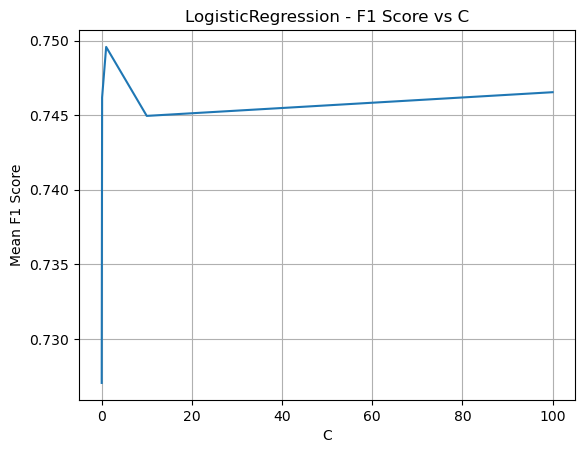

Training RandomForest...


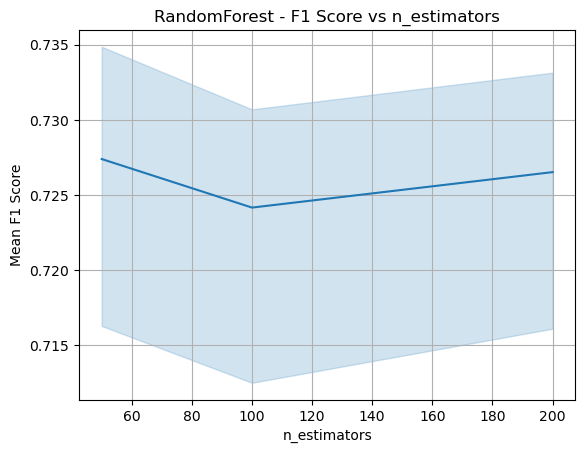

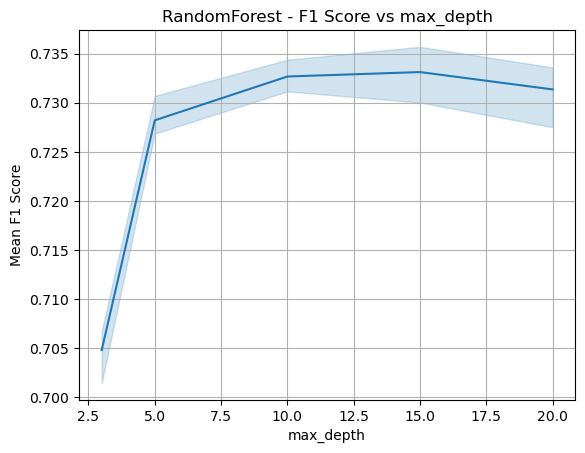

Training DecisionTree...


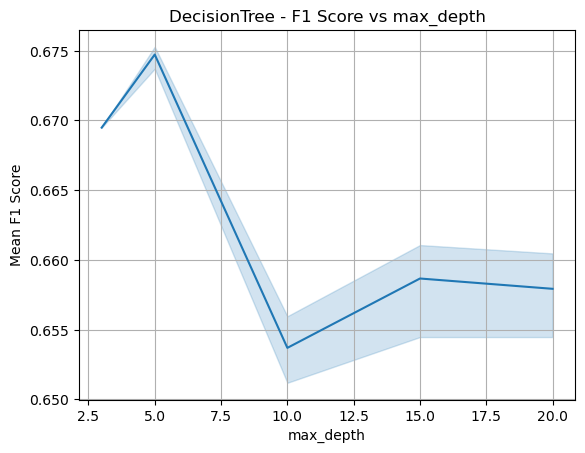

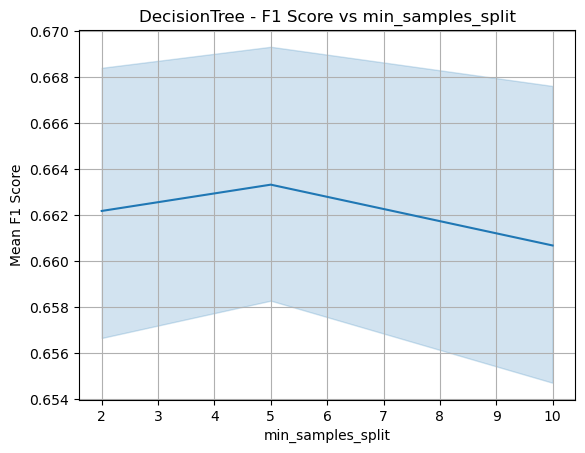

In [52]:
# 9. Train and tune multiple classifiers
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

param_grids = {
    "LogisticRegression": {"C": [0.01, 0.1, 1, 10, 100]},
    "RandomForest": {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10,15,20]},
    "DecisionTree": {"max_depth": [3, 5, 10, 15,20,None], "min_samples_split": [2, 5, 10]}
}

best_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    grid = GridSearchCV(model, param_grids[name], scoring="f1_macro", cv=5, return_train_score=True)
    grid.fit(X_train, y_train)

    # Visualization: mean cross-validated F1 score vs one parameter (first one in grid)
    for param_name in param_grids[name].keys():

        mean_scores = pd.DataFrame(grid.cv_results_)[['param_' + param_name, 'mean_test_score']]
        plt.figure()
        sns.lineplot(x=mean_scores['param_' + param_name], y=mean_scores['mean_test_score'])
        plt.title(f'{name} - F1 Score vs {param_name}')
        plt.xlabel(param_name)
        plt.ylabel('Mean F1 Score')
        plt.grid(True)
        plt.show()

Evaluating LogisticRegression...
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       100
           1       0.65      0.72      0.68        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154

Best parameters for LogisticRegression: {'max_depth': 5, 'min_samples_split': 10}


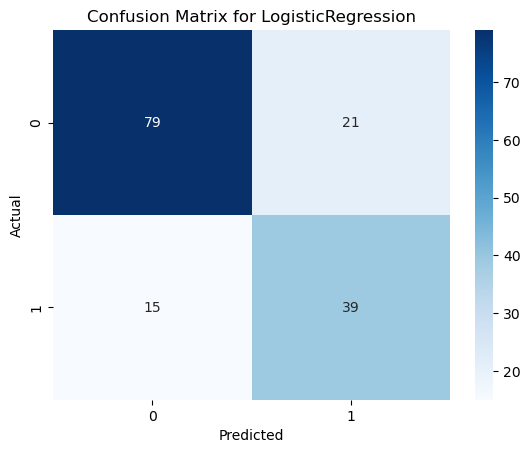

Evaluating RandomForest...
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       100
           1       0.65      0.72      0.68        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154

Best parameters for RandomForest: {'max_depth': 5, 'min_samples_split': 10}


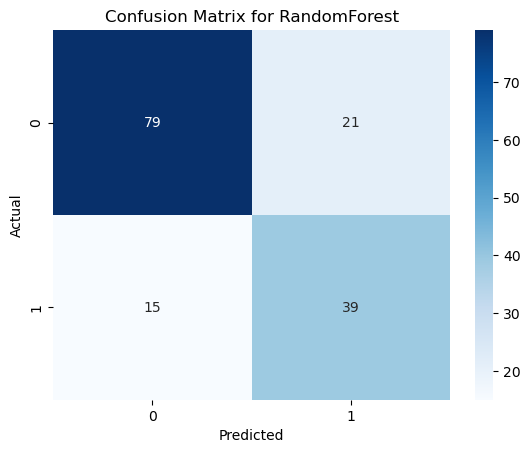

Evaluating DecisionTree...
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       100
           1       0.65      0.72      0.68        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154

Best parameters for DecisionTree: {'max_depth': 5, 'min_samples_split': 10}


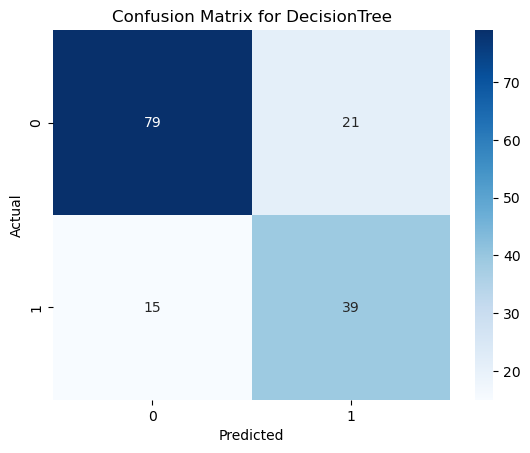

In [51]:
#11. Evaluate the best model
for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = grid.best_estimator_.predict(X_test)
    print(classification_report(y_test, y_pred))
    best_models[name] = grid.best_estimator_

    print(f"Best parameters for {name}: {grid.best_params_}")
    sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()